<a href="https://colab.research.google.com/github/Miragecore/SandBox/blob/main/PID_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#https://gist.github.com/bradley219/5373998

class PID:
  def __init__(self, kp_, ki_, kd_, max_, min_, dt_):
    self.pre_error = 0
    self.integral = 0
    self.kp = kp_
    self.ki = ki_
    self.kd = kd_
    self.max = max_
    self.min = min_
    self.dt = dt_

  def Calculate(self, setpoint, pv):
    error = setpoint - pv

    Pout = self.kp * error;   # 편차에 빠르게 수렴하기 위함
    
    self.integral = self.integral + error * self.dt

    Iout = self.ki * self.integral  #잔류 편차를 따라가기 위함

    derivative = (error - self.pre_error) / self.dt

    Dout = self.kd * derivative. #에러 변화량에 빠르게 따라가기 위함

    output = Pout + Iout + Dout;

    if output > self.max :
      output = self.max
    elif output < self.min :
      output = self.min
    
    self.pre_error = error

    return output;

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
x = np.linspace ( start = 0.    # lower limit
                , stop = 10      # upper limit
                , num = 90      # generate 51 points between 0 and 3
                )

In [113]:
PIDCont = PID(7.5,0.6,0,150,-50,0.1)

pv = 0
pvs = []

for i in np.arange(1,10,0.1):
  out = PIDCont.Calculate(100, pv);
  pv = pv + out / 5;
  pvs.append(pv)
  #print(out,pv)

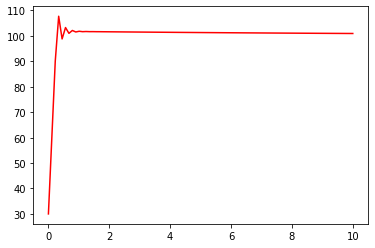

In [114]:
plt.plot( x
        , pvs
        , 'r-'  # plot with the color red, as line
        )